<div class="alert alert-block alert-info">
Singapore Management University<br>
<i>CS105 Statistical Thinking for Data Science</i>, 2019/20 Term 2
</div>

# CS105 Wine Quality Project

>#### Table of Contents
>
>- Introduction
>- Dataset Exploration
>- Exploratory Data Analysis
>    - Categorical Variables
>    - Numerical Variables
>- Model Building
>- Model Evaluation
>- Conclusion
>- References

## 1 Introduction
Wine is an alcoholic beverages that has a number of attributes that we can measure. The 12 attributes in our dataset are: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxidee, total sulfur dioxide, density, pH, sulphates, alcohol, and quality. In this research project we seek to find a correlation between the attributes of a Wine, with something all too difficult to quantify, its quality.

## 2 Dataset Exploration
* Import data for both red and white wine
* Test for missing values
* Test for numerical attributes (they should all be numerical in nature)

### Importing Data

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_red = pd.read_csv("winequality-red.csv", sep = ';')
data_white = pd.read_csv("winequality-white.csv", sep = ';')

In [5]:
display(data_red.head())
display(data_white.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Test for missing values
A quick peek with the following observations
- there are no missing values that need to be dealt with
- there are only numerical variables

In [6]:
r_rows, r_cols = data_red.shape
w_rows, w_cols = data_white.shape

print(f"There are a total of {r_rows} observations with {r_cols} columns for the red wine table")
print(f"There are a total of {w_rows} observations with {w_cols} columns for the white wine table")
print("")

# calculate percentage of non-NaN data

missing_percent_r = 1.- data_red.count() / r_rows
missing_percent_w = 1.- data_white.count() / w_rows

# filter for columns with non-zero count of NaN data

missing_percent_r[missing_percent_r>0.0]
print(f"Number of attributes with missing data (red): {len(missing_percent_r[missing_percent_r>0.0])}")

missing_percent_w[missing_percent_w>0.0]
print(f"Number of attributes with missing data (white): {len(missing_percent_w[missing_percent_w>0.0])}")
print("From the above, we can conclude that there are no missing data in all 12 attributes of each data set")

There are a total of 1599 observations with 12 columns for the red wine table
There are a total of 4898 observations with 12 columns for the white wine table

Number of attributes with missing data (red): 0
Number of attributes with missing data (white): 0
From the above, we can conclude that there are no missing data in all 12 attributes of each data set


### Test for numerical data

In [7]:
# Get a list of numerical, categorical features

datatypes_r = data_red.dtypes

datatypes_w = data_white.dtypes

numerical_features_r = datatypes_r[datatypes_r!="object"].index
numerical_features_w = datatypes_w[datatypes_w!="object"].index

print(f"Red's numerical attributes: {len(numerical_features_r)}")
print(f"White's numerical attributes: {len(numerical_features_w)}")
print("Both the red and white wine 12 attributes, all of which are numerical.")

Red's numerical attributes: 12
White's numerical attributes: 12
Both the red and white wine 12 attributes, all of which are numerical.


## 3 Exploratory Data Analysis

In this section we will perform EDA to understand the data.  The main outcome of this exercise is to help us do attribute selection.  In other words, we want to design a set of attributes which could be used as our independent variables to predict the `Quality` in our model later.

>#### EDA (Exploratory Data Analysis)
>
>- Visual Analysis - Box Plot
>- Visual Analysis - Histogram
>- Correlation Analysis - Red Wine
>    - Removing Attributes - Red Wine (Low Correlation with Wine Quality)
>    - Removing Attribute - Red Wine (High Correlation with another Attribute)
>- Correlation Analysis - White Wine
>    - Removing Attributes - White Wine (Low Correlation with Wine Quality)
>    - Removing Attribute - White Wine (High Correlation with another Attribute)


### 3.1 Visual Analysis - Box Plot

We will be conducting a box plot analysis to inspect the data for outliers

Box Plot Analysis (Red Wine)


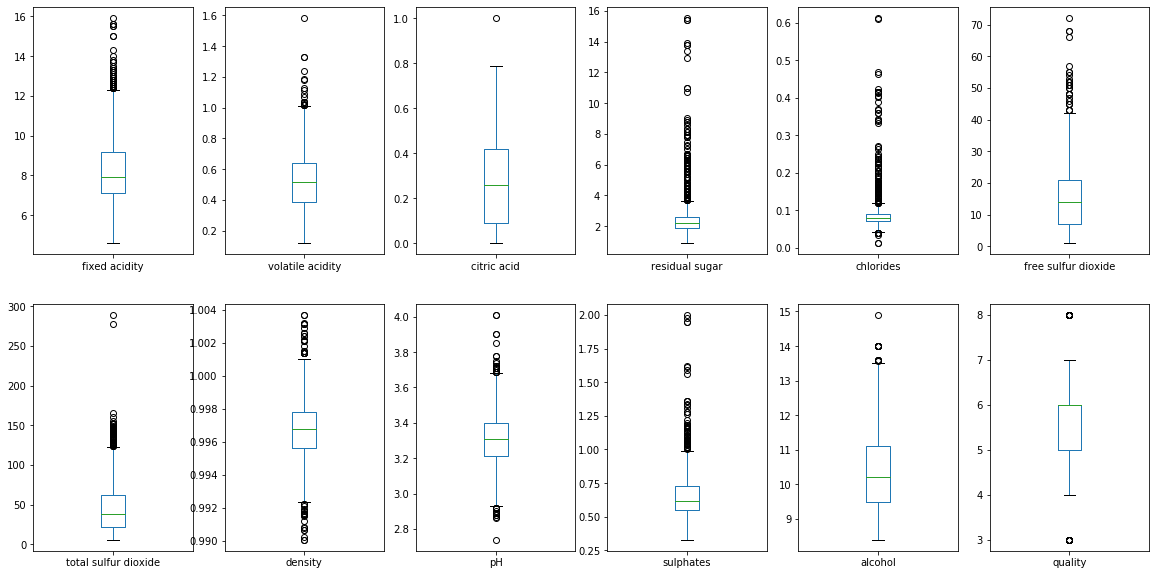

In [8]:
data_red[numerical_features_r].plot(kind='box',  subplots=True, layout=(2, 6), figsize=(20, 10))
print("Box Plot Analysis (Red Wine)")
plt.show()

Box Plot Analysis (White Wine)


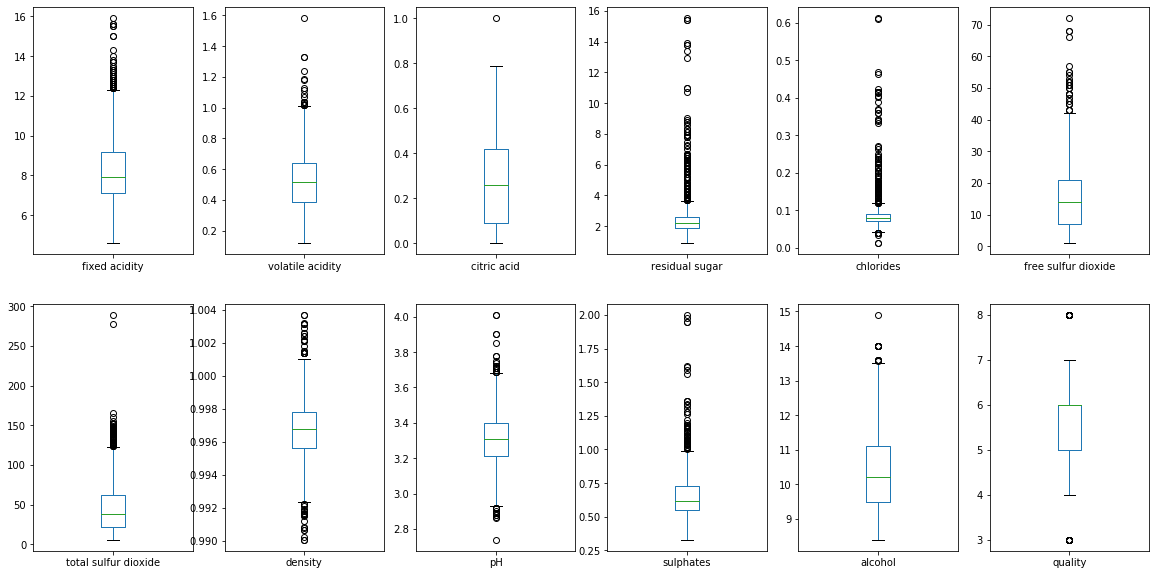

In [9]:
data_red[numerical_features_w].plot(kind='box',  subplots=True, layout=(2, 6), figsize=(20, 10))
print("Box Plot Analysis (White Wine)")
plt.show()

From visual observation, residual sugar, chlorides and sulphates have a large amount of outliers in the upper quartile. This indicates that there are many readings on the higher end which may skew the regression model.

### 3.2 Visual Analysis - Histogram

We will be conducting a histogram analysis to inspect the data for patterns

Histogram (Red Wine)


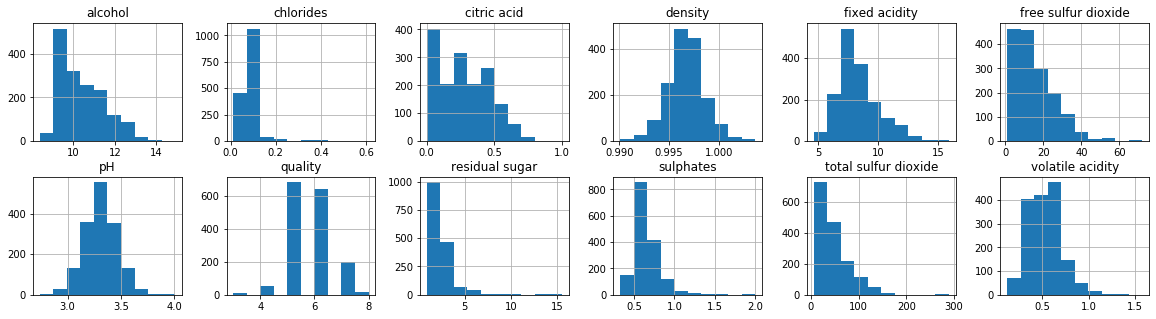

In [22]:
data_red[numerical_features_r].hist(layout=(2,6), figsize=(20,5))
plt.savefig("numerical_r.jpg")
print("Histogram (Red Wine)")
plt.show()

Histogram (White Wine)


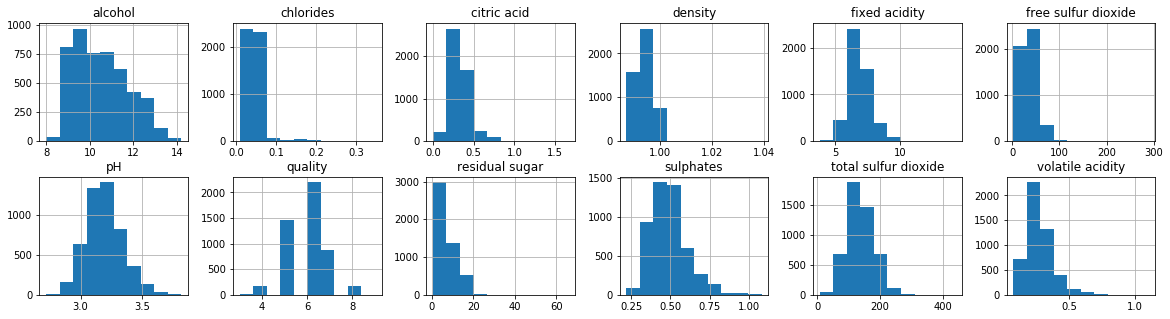

In [21]:
data_white[numerical_features_w].hist(layout=(2,6), figsize=(20,5))
plt.savefig("numerical_w.jpg")
print("Histogram (White Wine)")
plt.show()

Based on a visual observation we noted the following:
- Residual sugar is on average lower for red wine as compared to white wine.
- Overall, red wine is rated lower on average as compared to white wine.

### 3.3 Correlation Analysis - Red Wine
We will be analysing it in 2 parts, first we will remove attributes that have a low correlation with the emperical wine quality data, so as to filter for attributes that have a greater impact on the quality of the wine.

Then, we will remove attributes with a high correlation with other attributes, keeping the attribute with the highest correlation to wine quality. This is so as to filter out synonym attributes, attributes that describes the same thing.

In [69]:
print("Attribute Correlation Table - Red Wine")
data_red.corr()

Attribute Correlation Table - Red Wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Attribute Correlation Heat Map - Red Wine


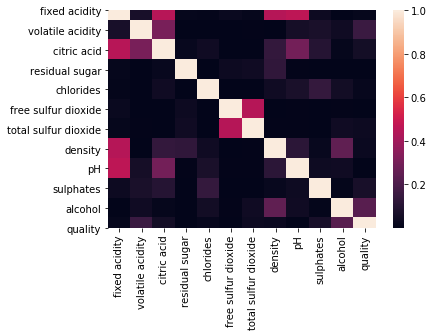

In [70]:
import seaborn as sns
r2 = data_red.corr()**2
sns.heatmap(r2)
print("Attribute Correlation Heat Map - Red Wine")
plt.show()

### 3.3.1 Removing Attributes - Red Wine (Low Correlation with Wine Quality)
Removing attributes with a less than 15% correlation with our emperical quality data. This is to only take into consideration 

In [71]:
# given a dataframe df, and a target variable and threshold
# return all columns in df which are 'highly' correlated to target
# definition of 'high' correlated given by parameter threshold

def corr_features(df, target, threshold):
    corr_features = []
    for feature in df.columns:
        if feature==target: continue
        x = df[feature]
        y = df[target]
        r2 = np.corrcoef(x,y)[0][1]
        if abs(r2)>threshold:
            corr_features.append(feature)
    return corr_features


features_selected = corr_features(data_red, 'quality', 0.15)
print(f"Selected Attributes - Red Wine : {features_selected}")
print("Removed Attributes: fixed acidity, residual sugar, chlorides, free sulfur dioxide, pH")

Selected Attributes - Red Wine : ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
Removed Attributes: fixed acidity, residual sugar, chlorides, free sulfur dioxide, pH


Attribute Correlation Heat Map - Red Wine (after removing attributes with low correlation)


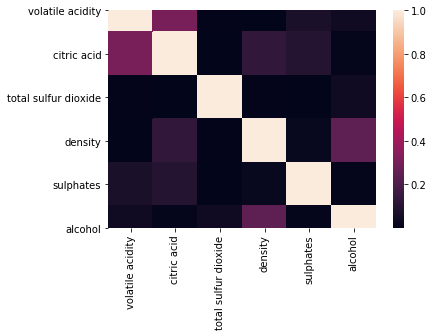

In [72]:
r2 = data_red[features_selected].corr()**2
sns.heatmap(r2)
print("Attribute Correlation Heat Map - Red Wine (after removing attributes with low correlation)")
plt.show()

### 3.3.2 Removing Attribute - Red Wine (High Correlation with another Attribute)
Removing attributes with more than a 50% correlation with another attribute of wine. (not including wine quality, our output data)

In [73]:
# get the feature that has the most number of features
# it is correlated with, beyond certain threshold

def most_corr_feature(df, threshold):
    r2_matrix = abs(df.corr())
    count = r2_matrix[r2_matrix>threshold].count()
    return count.sort_values(ascending=False).index[0]


# return true if all the features are uncorrelated,
# as defined by a threshold

def all_features_uncorr(df, threshold):
    r2_matrix = abs(df.corr())
    n = len(r2_matrix)
    return r2_matrix[r2_matrix>threshold].count().sum()==n


# get a set of uncorrelated features

def get_uncorr_features(df, threshold):
    features = df.columns.tolist()
    while all_features_uncorr(df[features], threshold) == False:
        most_corr_fea = most_corr_feature(df[features], threshold)
        features.remove(most_corr_fea)
    return features

features_selected = get_uncorr_features(data_red[features_selected], 0.5)
print(f"Final Selected Attributes - Red Wine : {features_selected}")

Final Selected Attributes - Red Wine : ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


Attribute Correlation Heat Map (Final Selected Attributes - Red Wine)


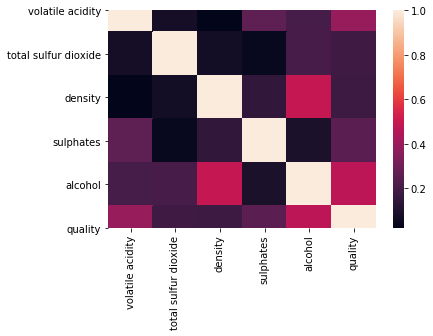

In [74]:
data_red[features_selected+['quality']].corr()
r2 = abs(data_red[features_selected+['quality']].corr())
sns.heatmap(r2)
plt.savefig("final_corr.jpg")
print("Attribute Correlation Heat Map (Final Selected Attributes - Red Wine)")
plt.show()

### 3.4 Correlation Analysis - White Wine
We will be analysing it in 2 parts, first we will remove attributes that have a low correlation with the emperical wine quality data, so as to filter for attributes that have a greater impact on the quality of the wine.

Then, we will remove attributes with a high correlation with other attributes, keeping the attribute with the highest correlation to wine quality. This is so as to filter out synonym attributes, attributes that describes the same thing.

In [75]:
print("Attribute Correlation Table - White Wine")
data_white.corr()

Attribute Correlation Table - White Wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Attribute Correlation Heat Map - White Wine


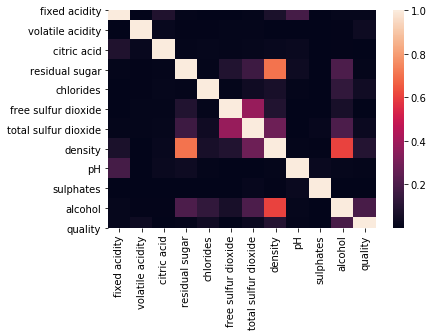

In [76]:
r2_w = data_white.corr()**2
sns.heatmap(r2_w)
print("Attribute Correlation Heat Map - White Wine")
plt.show()

### 3.4.1 Removing Attributes - White Wine (Low Correlation with Wine Quality)
Removing attributes with a less than 15% correlation with our emperical quality data.

In [77]:
def corr_features(df, target, threshold):
    corr_features = []
    for feature in df.columns:
        if feature==target: continue
        x = df[feature]
        y = df[target]
        r2 = np.corrcoef(x,y)[0][1]
        if abs(r2)>threshold:
            corr_features.append(feature)
    return corr_features

features_selected_w = corr_features(data_white, 'quality', 0.15)
print(f"Selected Attributes - White Wine : {features_selected_w}")
print("Removed Attributes: fixed acidity, citric acid, residual sugar, free sulfur dioxide, pH, sulphates")

Selected Attributes - White Wine : ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol']
Removed Attributes: fixed acidity, citric acid, residual sugar, free sulfur dioxide, pH, sulphates


Attribute Correlation Heat Map - White Wine (after removing attributes with low correlation)


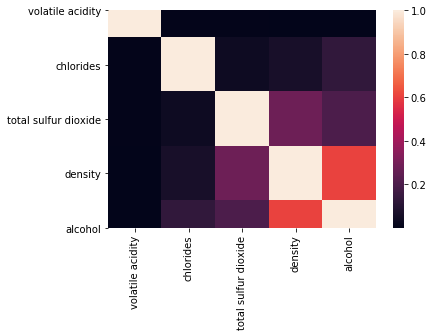

In [78]:
r2 = data_white[features_selected_w].corr()**2
sns.heatmap(r2)
print("Attribute Correlation Heat Map - White Wine (after removing attributes with low correlation)")
plt.show()

### 3.4.2 Removing Attribute - White Wine (High Correlation with another Attribute)
Removing attributes with more than a 50% correlation with another attribute of wine. (not including wine quality, our output data)

In [82]:
features_selected_w = get_uncorr_features(data_white[features_selected_w], 0.5)
print(f"Final Selected Attributes - White Wine : {features_selected_w}")
print("Removed Attributes: Density")

Final Selected Attributes - White Wine : ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'alcohol']
Removed Attributes: Density


Attribute Correlation Heat Map - White Wine (Final Selected Attributes)
Removed Attributes: Density


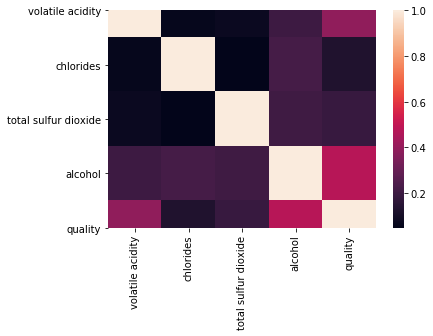

In [81]:
data_white[features_selected_w+['quality']].corr()
r2 = abs(data_red[features_selected_w+['quality']].corr())
sns.heatmap(r2)
plt.savefig("final_corr.jpg")
print("Attribute Correlation Heat Map - White Wine (Final Selected Attributes)")
plt.show()

## 4 Model Building

We will build a Linear Regression model based on the selected features.  We split the dataset into train/test set and then fit our model with the train dataset and evaluate the model using the test set.

We use the `model_selection` package form `sklearn` to split our dataset randomly into 75/25 i.e. we keep 25% of the dataset for model evaluation purpose.

For model fitting, we first create instantiae a `LinearRegression` object, and subsequently call the `.fit` method.  We have also created a function to log-tranform the necessary columns.

In [23]:
## repeated 100 samples cross validation 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

result_df = pd.DataFrame(columns = ['randomstate','coeff','intercept','score_train','score_test'])
display(features_selected)

for i in range (1,100):
    X = data_red[features_selected]
    y = data_red[["quality"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=i)
    
    model = LinearRegression().fit(X_train, y_train)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)
    coef = model.coef_
    bias = model.intercept_
    
    result_df = result_df.append({'randomstate':i,'coeff': coef, 'intercept': bias, 'score_train': r2_train, 'score_test':r2_test}, ignore_index=True)
    

display(result_df.head())



['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']

,randomstate,coeff,intercept,score_train,score_test
0,1,"[[-1.3278475848940174, -0.002586803314985513, ...",[-2.9773466892382237],0.358136,0.325940
1,2,"[[-1.3174633281129642, -0.002276844341350606, ...",[-16.75651635061729],0.339723,0.332878
2,3,"[[-1.1833597329482852, -0.0021477126463153055,...",[0.6707694006573206],0.352898,0.332189
3,4,"[[-1.2327666579330183, -0.0021917786433978278,...",[1.6375873936730772],0.352745,0.332888
4,5,"[[-1.309478582494891, -0.0015310537526481737, ...",[-16.14321141313439],0.323240,0.358235


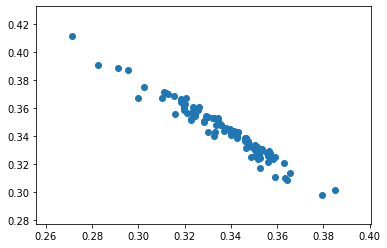

In [25]:
#visualisation of the different score_test and score_train

import matplotlib as matplot
matplot.pyplot.scatter(result_df['score_test'],result_df['score_train'])

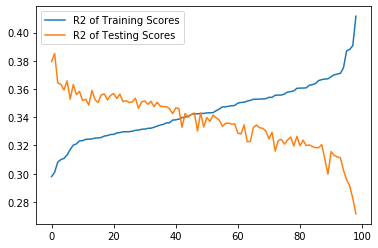

In [26]:
#selecting the model where the R2 values have the smallest difference, ie the point of intersection

result_df_line = result_df.sort_values(by = 'score_train', ascending = True)
result_df_line = result_df_line.reset_index()

matplot.pyplot.plot(result_df_line.index, result_df_line['score_train'], label = 'R2 of Training Scores')
matplot.pyplot.plot(result_df_line.index, result_df_line['score_test'], label = 'R2 of Testing Scores')
matplot.pyplot.legend()


In [27]:
# selecting the best equation from the random state
# selecting the model with the smallest difference between r2 value for score_train and score_test

result_df["score_difference"] = abs(result_df["score_train"] - result_df["score_test"])

result_df = result_df.sort_values(by = 'score_difference', ascending = True)
result_df = result_df.reset_index()
display(result_df.head())

bestrandomstate_1 = result_df["randomstate"][0]
bestcoeff_1 = result_df["coeff"][0]
bestintercept_1 = result_df["intercept"][0]
bestscore_train_1 = result_df["score_train"][0]
bestscore_test_1 = result_df["score_test"][0]

bestrandomstate_2 = result_df["randomstate"][1]
bestcoeff_2 = result_df["coeff"][1]
bestintercept_2 = result_df["intercept"][1]
bestscore_train_2 = result_df["score_train"][1]
bestscore_test_2 = result_df["score_test"][1]

bestrandomstate_3 = result_df["randomstate"][2]
bestcoeff_3 = result_df["coeff"][2]
bestintercept_3 = result_df["intercept"][2]
bestscore_train_3 = result_df["score_train"][2]
bestscore_test_3 = result_df["score_test"][2]

print(f"Features : {features_selected}")
print()

print("--- Best Model ---")
print(f"Random Seed: {bestrandomstate_1}")
print(f"Coefficients: {bestcoeff_1}")
print(f"Intercept : {bestintercept_1}")
print(f"R2 of Training Set : {bestscore_train_1}")
print(f"R2 of Testing Set : {bestscore_test_1}")
print()

print("--- 2nd Model ---")
print(f"Random Seed: {bestrandomstate_2}")
print(f"Coefficients: {bestcoeff_2}")
print(f"Intercept : {bestintercept_2}")
print(f"R2 of Training Set : {bestscore_train_2}")
print(f"R2 of Testing Set : {bestscore_test_2}")
print()

print("--- 3rd Model ---")
print(f"Random Seed: {bestrandomstate_3}")
print(f"Coefficients: {bestcoeff_3}")
print(f"Intercept : {bestintercept_3}")
print(f"R2 of Training Set : {bestscore_train_3}")
print(f"R2 of Testing Set : {bestscore_test_3}")
print()

                     
                      

,index,randomstate,coeff,intercept,score_train,score_test,score_difference
0,71,72,"[[-1.163836281585175, -0.002109849228576337, -...",[15.1608670751105],0.341953,0.341898,0.000056
1,62,63,"[[-1.2547610244409493, -0.0024117405618375603,...",[4.469177035003236],0.342617,0.343051,0.000434
2,30,31,"[[-1.337228376258548, -0.002438019861654079, 1...",[-10.453016695922454],0.340686,0.340021,0.000665
3,89,90,"[[-1.2172852977011916, -0.0018898864087655883,...",[0.7073598499332965],0.342356,0.343065,0.000709
4,57,58,"[[-1.1295751829141012, -0.0017881878191953714,...",[9.18882682708154],0.343253,0.341517,0.001736


Features : ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']

--- Best Model ---
Random Seed: 72
Coefficients: [[-1.16383628e+00 -2.10984923e-03 -1.21430612e+01  7.40561858e-01
   2.69940643e-01]]
Intercept : [15.16086708]
R2 of Training Set : 0.34195337261259273
R2 of Testing Set : 0.3418976697572239

--- 2nd Model ---
Random Seed: 63
Coefficients: [[-1.25476102 -0.00241174 -1.63038196  0.81370711  0.29018477]]
Intercept : [4.46917704]
R2 of Training Set : 0.34261721822066116
R2 of Testing Set : 0.3430509246183647

--- 3rd Model ---
Random Seed: 31
Coefficients: [[-1.33722838e+00 -2.43801986e-03  1.33247747e+01  5.00549488e-01
   3.14081525e-01]]
Intercept : [-10.4530167]
R2 of Training Set : 0.34068597839696413
R2 of Testing Set : 0.34002081757160224



### 6 Model Evaluation & Sensitivity Analysis

In [28]:
## model evaluation

from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=bestrandomstate_1)

model = LinearRegression().fit(X_train, y_train)

# predict based on test set
y_pred = model.predict(X_test)

# compare with ground truth
mae=mean_absolute_error(y_test, y_pred)

ave=np.mean(y_test["quality"])

print("Model Evaluation")
print()

print("-------- Best Model --------")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave:.2f}")
print()

# analysis for different tolerance ranges

y_pred_df = pd.DataFrame(data = y_pred)
#display(y_pred_df)

y_test_0 = y_test.reset_index()
#display(y_test_0)

bestmodel_df = pd.concat([y_pred_df, y_test_0["quality"]], axis = 1, ignore_index = True)
bestmodel_df = bestmodel_df.rename(columns = {0: "y_pred", 1: "y_actual"})
#display(bestmodel_df)

def atleasterror(df1, df2, error_range):
    outputdf = pd.DataFrame(columns = ['error'])
    for i in range (0, df1.size):
        #display(df1[i])
        #display(df2[i])
        
        if abs(df1[i] - df2[i]) > error_range:
            error = abs(df1[i]-df2[i]) - error_range
            #display(error)
            outputdf = outputdf.append({'error': error}, ignore_index = True)
        else:
            #display(0)
            outputdf = outputdf.append({'error': 0}, ignore_index = True)
    return outputdf

    
bestmodel_df["error_0.25"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.25)
bestmodel_df["error_0.5"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.5)
bestmodel_df["error_0.75"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.75)
bestmodel_df["error_1"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 1)

display(bestmodel_df.head())

# determing mean absolute error
error_25_mean = bestmodel_df["error_0.25"].mean()
error_50_mean = bestmodel_df["error_0.5"].mean()
error_75_mean = bestmodel_df["error_0.75"].mean()
error_100_mean = bestmodel_df["error_1"].mean()

print(f"With a tolerance value of 0.25, the MAE is {error_25_mean}, which as a percentage of mean is {error_25_mean/ave}")
print(f"With a tolerance value of 0.5, the MAE is {error_50_mean}, which as a percentage of mean is {error_50_mean/ave}")
print(f"With a tolerance value of 0.75, the MAE is {error_75_mean}, which as a percentage of mean is {error_75_mean/ave}")
print(f"With a tolerance value of 1, the MAE is {error_100_mean}, which as a percentage of mean is {error_100_mean/ave}")
print()

##############
# Similar evaulation code for 2nd model
##############

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=bestrandomstate_2)

model = LinearRegression().fit(X_train, y_train)

# predict based on test set
y_pred = model.predict(X_test)

# compare with ground truth
mae=mean_absolute_error(y_test, y_pred)

ave=np.mean(y_test["quality"])

print("-------- 2nd Model --------")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave:.2f}")
print()

# analysis for different tolerance ranges

y_pred_df = pd.DataFrame(data = y_pred)
#display(y_pred_df)

y_test_0 = y_test.reset_index()
#display(y_test_0)

bestmodel_df = pd.concat([y_pred_df, y_test_0["quality"]], axis = 1, ignore_index = True)
bestmodel_df = bestmodel_df.rename(columns = {0: "y_pred", 1: "y_actual"})
#display(bestmodel_df)

def atleasterror(df1, df2, error_range):
    outputdf = pd.DataFrame(columns = ['error'])
    for i in range (0, df1.size):
        #display(df1[i])
        #display(df2[i])
        
        if abs(df1[i] - df2[i]) > error_range:
            error = abs(df1[i]-df2[i]) - error_range
            #display(error)
            outputdf = outputdf.append({'error': error}, ignore_index = True)
        else:
            #display(0)
            outputdf = outputdf.append({'error': 0}, ignore_index = True)
    return outputdf

    
bestmodel_df["error_0.25"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.25)
bestmodel_df["error_0.5"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.5)
bestmodel_df["error_0.75"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.75)
bestmodel_df["error_1"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 1)

display(bestmodel_df.head())

# determing mean absolute error
error_25_mean = bestmodel_df["error_0.25"].mean()
error_50_mean = bestmodel_df["error_0.5"].mean()
error_75_mean = bestmodel_df["error_0.75"].mean()
error_100_mean = bestmodel_df["error_1"].mean()

print(f"With a tolerance value of 0.25, the MAE is {error_25_mean}, which as a percentage of mean is {error_25_mean/ave}")
print(f"With a tolerance value of 0.5, the MAE is {error_50_mean}, which as a percentage of mean is {error_50_mean/ave}")
print(f"With a tolerance value of 0.75, the MAE is {error_75_mean}, which as a percentage of mean is {error_75_mean/ave}")
print(f"With a tolerance value of 1, the MAE is {error_100_mean}, which as a percentage of mean is {error_100_mean/ave}")
print()

##############
# Similar evaulation code for 3nd model
##############

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=bestrandomstate_3)

model = LinearRegression().fit(X_train, y_train)

# predict based on test set
y_pred = model.predict(X_test)

# compare with ground truth
mae=mean_absolute_error(y_test, y_pred)

ave=np.mean(y_test["quality"])

print("-------- 3rd Model --------")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave:.2f}")
print()

# analysis for different tolerance ranges

y_pred_df = pd.DataFrame(data = y_pred)
#display(y_pred_df)

y_test_0 = y_test.reset_index()
#display(y_test_0)

bestmodel_df = pd.concat([y_pred_df, y_test_0["quality"]], axis = 1, ignore_index = True)
bestmodel_df = bestmodel_df.rename(columns = {0: "y_pred", 1: "y_actual"})
#display(bestmodel_df)

def atleasterror(df1, df2, error_range):
    outputdf = pd.DataFrame(columns = ['error'])
    for i in range (0, df1.size):
        #display(df1[i])
        #display(df2[i])
        
        if abs(df1[i] - df2[i]) > error_range:
            error = abs(df1[i]-df2[i]) - error_range
            #display(error)
            outputdf = outputdf.append({'error': error}, ignore_index = True)
        else:
            #display(0)
            outputdf = outputdf.append({'error': 0}, ignore_index = True)
    return outputdf

    
bestmodel_df["error_0.25"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.25)
bestmodel_df["error_0.5"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.5)
bestmodel_df["error_0.75"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.75)
bestmodel_df["error_1"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 1)

display(bestmodel_df.head())

# determing mean absolute error
error_25_mean = bestmodel_df["error_0.25"].mean()
error_50_mean = bestmodel_df["error_0.5"].mean()
error_75_mean = bestmodel_df["error_0.75"].mean()
error_100_mean = bestmodel_df["error_1"].mean()

print(f"With a tolerance value of 0.25, the MAE is {error_25_mean}, which as a percentage of mean is {error_25_mean/ave}")
print(f"With a tolerance value of 0.5, the MAE is {error_50_mean}, which as a percentage of mean is {error_50_mean/ave}")
print(f"With a tolerance value of 0.75, the MAE is {error_75_mean}, which as a percentage of mean is {error_75_mean/ave}")
print(f"With a tolerance value of 1, the MAE is {error_100_mean}, which as a percentage of mean is {error_100_mean/ave}")

Model Evaluation

-------- Best Model --------
Mean Absolute Error: 0.52
MAE as % of mean: 0.09



,y_pred,y_actual,error_0.25,error_0.5,error_0.75,error_1
0,5.505770,6,0.244230,0,0,0
1,5.208682,6,0.541318,0.291318,0.041318,0
2,5.764920,6,0.000000,0,0,0
3,5.395730,6,0.354270,0.10427,0,0
4,5.049391,5,0.000000,0,0,0


With a tolerance value of 0.25, the MAE is 0.30797010059658286, which as a percentage of mean is 0.05472591747606981
With a tolerance value of 0.5, the MAE is 0.16885355033655966, which as a percentage of mean is 0.030005073360561466
With a tolerance value of 0.75, the MAE is 0.0850907149289814, which as a percentage of mean is 0.015120517979383633
With a tolerance value of 1, the MAE is 0.04357093814674812, which as a percentage of mean is 0.007742503446778874

-------- 2nd Model --------
Mean Absolute Error: 0.49
MAE as % of mean: 0.09



,y_pred,y_actual,error_0.25,error_0.5,error_0.75,error_1
0,6.118609,6,0,0,0,0
1,5.157655,5,0,0,0,0
2,5.204757,5,0,0,0,0
3,5.110561,5,0,0,0,0
4,6.125688,7,0.624312,0.374312,0.124312,0


With a tolerance value of 0.25, the MAE is 0.28276245415987145, which as a percentage of mean is 0.05007969079652361
With a tolerance value of 0.5, the MAE is 0.15043092052578413, which as a percentage of mean is 0.026642624844061834
With a tolerance value of 0.75, the MAE is 0.07365288895292114, which as a percentage of mean is 0.013044567447938214
With a tolerance value of 1, the MAE is 0.033152263117938494, which as a percentage of mean is 0.005871554238288863

-------- 3rd Model --------
Mean Absolute Error: 0.50
MAE as % of mean: 0.09



,y_pred,y_actual,error_0.25,error_0.5,error_0.75,error_1
0,5.813367,6,0,0,0,0
1,6.262291,7,0.487709,0.237709,0,0
2,5.275650,5,0.0256495,0,0,0
3,5.540798,4,1.2908,1.0408,0.790798,0.540798
4,6.078310,5,0.82831,0.57831,0.32831,0.0783105


With a tolerance value of 0.25, the MAE is 0.2864339251633292, which as a percentage of mean is 0.050685056432351994
With a tolerance value of 0.5, the MAE is 0.154073128385483, which as a percentage of mean is 0.027263548486703475
With a tolerance value of 0.75, the MAE is 0.07690128206017115, which as a percentage of mean is 0.013607835799189763
With a tolerance value of 1, the MAE is 0.03905041762138274, which as a percentage of mean is 0.006910049568039415


### 7 Conclusion



\begin{equation}
 SalePrice = 18759 + 67 \times Total Flr SF + 8225 \times Total Bath + 34 \times Total Bsmt SF - 643 \times Age + 66 \times Garage Area
\end{equation}


### 8 References
- Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
- Data Dictionary: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt